In [19]:
library(dplyr)
library(ggplot2)

In [29]:
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/coloc_genes.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/coloc/coloc_genes_w_sample_size.txt"

In [30]:
df = read.csv(filename, sep = "\t", header = F)
# df = read.csv(filename, row.names=1)

In [22]:
colnames(df) = c("gwas_trait","gene_name","eqtl_map","top_GTEx_brain","top_GTEx_non_brain","category")
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category
Neuroticism,LRRC37A2,qtl_results_NONE_DA_all,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N
Depressed affect,LRRC37A2,qtl_results_NONE_DA_all,Brain_Hypothalamus,Heart_Atrial_Appendage,N
Neuroticism,POLR3H,qtl_results_NONE_DA_all,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N
Neuroticism,FANCL,qtl_results_NONE_DA_all,Brain_Cerebellar_Hemisphere,Pancreas,N
Depressed affect,ANKZF1,qtl_results_NONE_DA_all,Brain_Hypothalamus,Whole_Blood,N
Cognitive performance,AHSA1,qtl_results_NONE_DA_all,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N


In [23]:
nrow(df[df$category == 'N',])

[1] 512

In [26]:
nrow(df[df$category == 'N' & df$eqtl_map == 'qtl_results_NONE_DA_all',])
nrow(df[df$category == 'N' & df$eqtl_map == 'qtl_results_NONE_Sert_all',])
nrow(df[df$category == 'N' & df$eqtl_map == 'qtl_results_NONE_Epen1_all',])
nrow(df[df$category == 'N' & df$eqtl_map == 'qtl_results_NONE_Astro_all',])

[1] 23

[1] 37

[1] 53

[1] 43

In [27]:
nrow(df[df$eqtl_map == 'qtl_results_NONE_DA_all',])
nrow(df[df$eqtl_map == 'qtl_results_NONE_Sert_all',])
nrow(df[df$eqtl_map == 'qtl_results_NONE_Epen1_all',])
nrow(df[df$eqtl_map == 'qtl_results_NONE_Astro_all',])

[1] 60

[1] 94

[1] 83

[1] 56

In [8]:
df$eqtl_map = as.character(df$eqtl_map)
unique(df$eqtl_map)

[1] "qtl_results_NONE_DA_all"                 
 [2] "qtl_results_ROT_DA_all"                  
 [3] "pool1_13_noddd_D30.DA.qtl_results_all"   
 [4] "qtl_results_NONE_Sert_all"               
 [5] "qtl_results_ROT_Sert_all"                
 [6] "pool1_13_noddd_D30.Sert.qtl_results_all" 
 [7] "qtl_results_NONE_Epen1_all"              
 [8] "qtl_results_ROT_Epen1_all"               
 [9] "pool1_13_noddd_D30.Epen1.qtl_results_all"
[10] "qtl_results_NONE_Astro_all"              
[11] "qtl_results_ROT_Astro_all"               
[12] "pool1_13_noddd_D30.Astro.qtl_results_all"
[13] "pool1_13_noddd_D11.FPP"                  
[14] "pool1_13_noddd_D11.P_FPP"                
[15] "pool1_13_noddd_D11.NB"

In [9]:
# options(repr.plot.width=5, repr.plot.height=5)
# df %>% group_by(gwas_trait) %>% summarise(n_coloc = n(), sample_size = mean(sample_size)) %>% 
#     ggplot(aes(x=sample_size, y = n_coloc)) + 
#     geom_point() + 
#     theme_bw() 

In [10]:
df$eqtl_map = as.character(df$eqtl_map)
df$eqtl_map = gsub(".qtl_results_all","",df$eqtl_map)
df$eqtl_map = gsub("qtl_results_","",df$eqtl_map)
df$eqtl_map = gsub("_all","",df$eqtl_map)
unique(df$eqtl_map)

[1] "NONE_DA"                  "ROT_DA"                  
 [3] "pool1_13_noddd_D30.DA"    "NONE_Sert"               
 [5] "ROT_Sert"                 "pool1_13_noddd_D30.Sert" 
 [7] "NONE_Epen1"               "ROT_Epen1"               
 [9] "pool1_13_noddd_D30.Epen1" "NONE_Astro"              
[11] "ROT_Astro"                "pool1_13_noddd_D30.Astro"
[13] "pool1_13_noddd_D11.FPP"   "pool1_13_noddd_D11.P_FPP"
[15] "pool1_13_noddd_D11.NB"

In [11]:
# library(dplyr)
library(ggplot2)

In [12]:
df = df %>% mutate(eqtl_map = factor(eqtl_map, levels=c("pool1_13_noddd_D11.FPP","pool1_13_noddd_D11.P_FPP",
                                                   "pool1_13_noddd_D11.NB",
                                                   "pool1_13_noddd_D30.Astro","pool1_13_noddd_D30.DA",
                                                   "pool1_13_noddd_D30.Sert","pool1_13_noddd_D30.Epen1",
                                                   "NONE_DA","NONE_Sert","NONE_Epen1","NONE_Astro",
                                                   "ROT_DA","ROT_Sert","ROT_Epen1","ROT_Astro")))

In [13]:
df$condition = c()
df$condition[grep('D11',df$eqtl_map)] = 'D11'
df$condition[grep('D30',df$eqtl_map)] = 'D30'
df$condition[grep('NONE',df$eqtl_map)] = 'D52'
df$condition[grep('ROT',df$eqtl_map)] = 'D52_ROT'
# head(df)

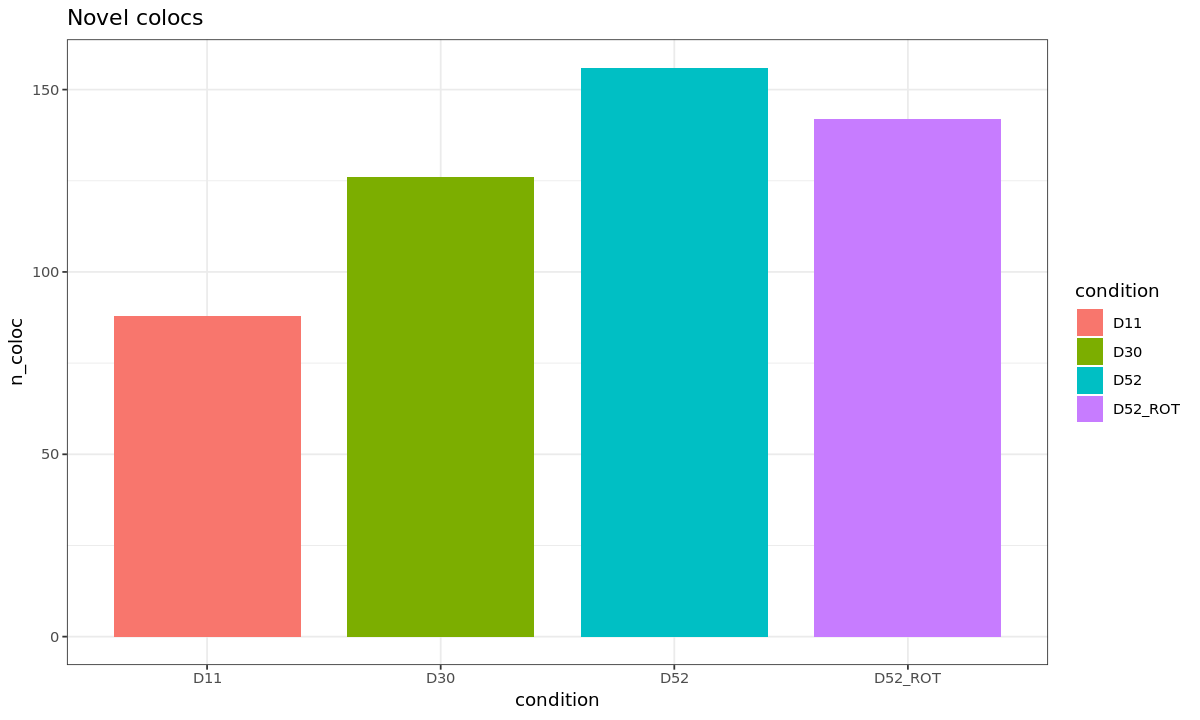

In [17]:
options(repr.plot.width=10, repr.plot.height=6)
df[df$category == 'N',] %>% group_by(condition) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=condition, y = n_coloc, fill = condition)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    theme_bw() + ggtitle('Novel colocs')

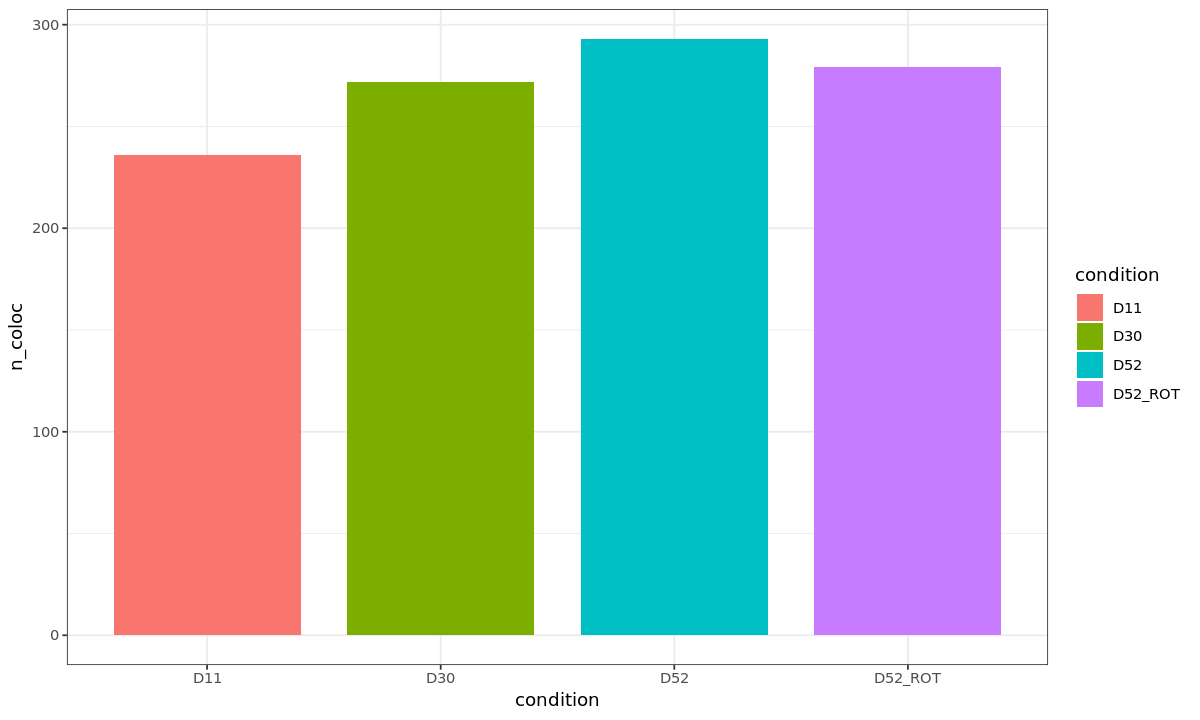

In [14]:
options(repr.plot.width=10, repr.plot.height=6)
df %>% group_by(condition) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=condition, y = n_coloc, fill = condition)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    theme_bw() 

In [52]:
df$celltype = df$condition
df$celltype[grep('FPP',df$eqtl_map)] = 'FPP'
df$celltype[grep('P_FPP',df$eqtl_map)] = 'P_FPP'
df$celltype[grep('NB',df$eqtl_map)] = 'NB'
df$celltype[grep('DA',df$eqtl_map)] = 'DA'
df$celltype[grep('Sert',df$eqtl_map)] = 'Sert'
df$celltype[grep('Epen1',df$eqtl_map)] = 'Epen1'
df$celltype[grep('Astro',df$eqtl_map)] = 'Astro'
df$celltype[df$celltype == 'Astro' & df$condition == 'D30'] = 'FPP'
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,condition,celltype
Neuroticism,LRRC37A2,NONE_DA,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N,D52,DA
Depressed affect,LRRC37A2,NONE_DA,Brain_Hypothalamus,Heart_Atrial_Appendage,N,D52,DA
Neuroticism,POLR3H,NONE_DA,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N,D52,DA
Neuroticism,FANCL,NONE_DA,Brain_Cerebellar_Hemisphere,Pancreas,N,D52,DA
Depressed affect,ANKZF1,NONE_DA,Brain_Hypothalamus,Whole_Blood,N,D52,DA
Cognitive performance,AHSA1,NONE_DA,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N,D52,DA


In [53]:
df = df %>% mutate(celltype = factor(celltype, levels=c("FPP","P_FPP","NB",
                                                       "DA","Sert","Epen1","Astro")))

In [55]:
col_FPP = "#aec7e8"
col_P_FPP = "#1f77b4"
col_NB = "#ff7f0e"

col_DA = "#2ca02c"
col_Sert = "#98df8a"
col_Epen1 = "#ff9896"
# col_Astro = "#d62728"
col_Astro = "#9467bd"

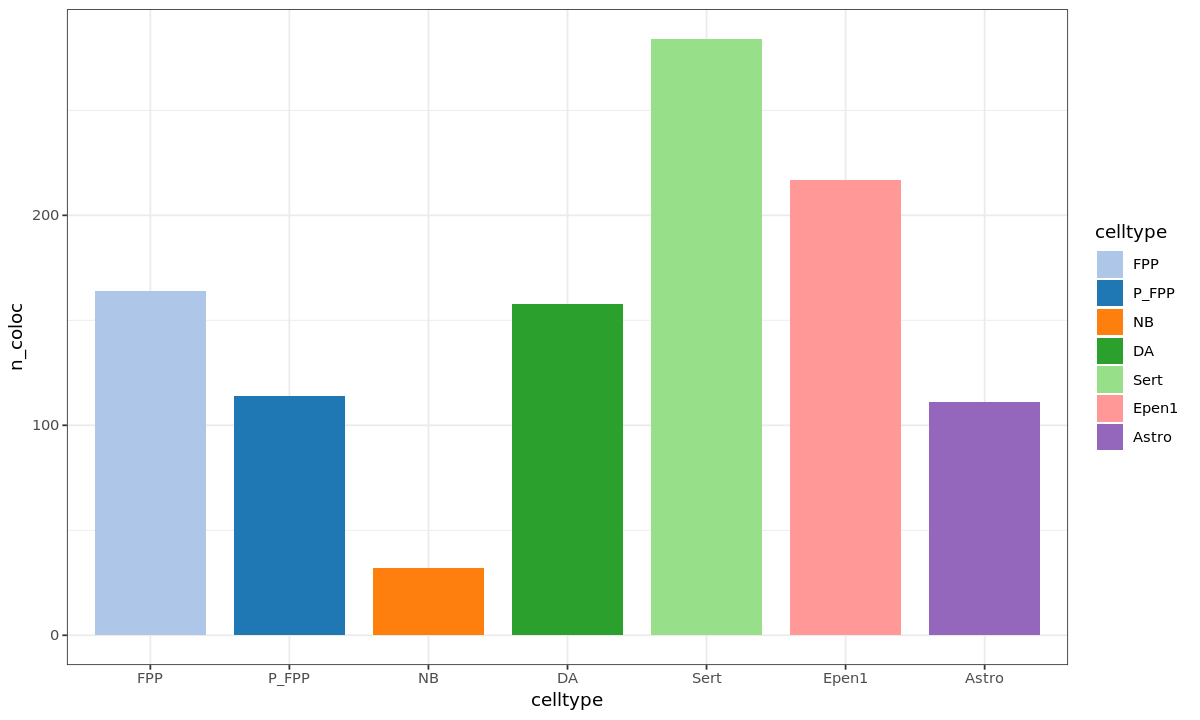

In [56]:
options(repr.plot.width=10, repr.plot.height=6)
df %>% group_by(celltype) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=celltype, y = n_coloc, fill = celltype)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    scale_fill_manual(values = c(col_FPP,col_P_FPP,col_NB,
                            col_DA,col_Sert,col_Epen1,col_Astro)) +
    theme_bw() 

In [57]:
# library(ggplot2)
# library(dplyr)

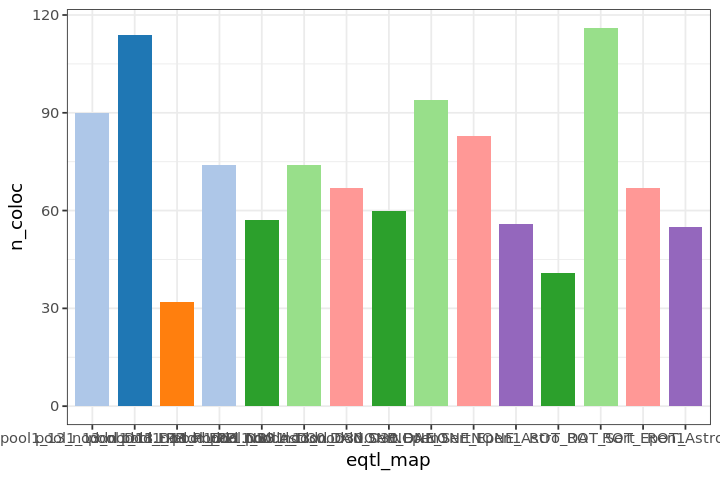

In [58]:
options(repr.plot.width=6, repr.plot.height=4)
df %>% group_by(eqtl_map) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=eqtl_map, y = n_coloc, fill = eqtl_map)) + geom_bar(stat = "identity", width = 0.8) + 
    scale_fill_manual(values = c(col_FPP,col_P_FPP,col_NB,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none")

In [59]:
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,condition,celltype
Neuroticism,LRRC37A2,NONE_DA,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N,D52,DA
Depressed affect,LRRC37A2,NONE_DA,Brain_Hypothalamus,Heart_Atrial_Appendage,N,D52,DA
Neuroticism,POLR3H,NONE_DA,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N,D52,DA
Neuroticism,FANCL,NONE_DA,Brain_Cerebellar_Hemisphere,Pancreas,N,D52,DA
Depressed affect,ANKZF1,NONE_DA,Brain_Hypothalamus,Whole_Blood,N,D52,DA
Cognitive performance,AHSA1,NONE_DA,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N,D52,DA


In [63]:
nrow(df[df$category == 'N' & df$celltype != 'NB',])
nrow(df[df$category == 'N' & df$condition %in% c('D11','D30'),])
nrow(df[df$category == 'N' & df$condition %in% c('D52','D52_ROT'),])

[1] 483

[1] 214

[1] 298

In [29]:
df$gwas_trait = as.character(df$gwas_trait)
unique(df$gwas_trait)
df$simpler_gwas_trait = df$gwas_trait
# df$simpler_gwas_trait[df$gwas_trait == 'Depressed affect'] = 'Depressed'
df$simpler_gwas_trait[df$gwas_trait == 'Depressed affect'] = 'Depression'
df$simpler_gwas_trait[df$gwas_trait == 'Cognitive performance'] = 'CognitivePerf'
df$simpler_gwas_trait[df$gwas_trait == 'Worrier / anxious feelings'] = 'Anxiety'
# df$simpler_gwas_trait[df$gwas_trait == 'Neuroticism score'] = 'NeuroticismScore'
df$simpler_gwas_trait[df$gwas_trait == 'Neuroticism score'] = 'Neuroticism'
df$simpler_gwas_trait[df$gwas_trait == 'Risk taking'] = 'RiskTaking'
df$simpler_gwas_trait[df$gwas_trait == 'College or University degree | Qualifications'] = 'CollegeDegree'
df$simpler_gwas_trait[df$gwas_trait == 'A levels/AS levels or equivalent | Qualifications'] = 'ALevels'
df$simpler_gwas_trait[df$gwas_trait == 'Educational attainment'] = 'EducationalAttainment'
df$simpler_gwas_trait[df$gwas_trait == 'Nervous feelings'] = 'Nervous'
df$simpler_gwas_trait[df$gwas_trait == 'Suffer from \'nerves\''] = 'Nerves'
df$simpler_gwas_trait[df$gwas_trait == 'Bipolar disorder'] = 'BD'
df$simpler_gwas_trait[df$gwas_trait == 'Sleeplessness / insomnia'] = 'Sleeplessness'
df$simpler_gwas_trait[df$gwas_trait == 'Other professional qualifications eg: nursing, teaching | Qualifications'] = 'OtherQualifications'
df$simpler_gwas_trait[df$gwas_trait == 'Depression (broad)'] = 'Depression'
df$simpler_gwas_trait[df$gwas_trait == 'Tense / \'highly strung\''] = 'Tense'
df$simpler_gwas_trait[df$gwas_trait == 'Number of fluid intelligence questions attempted within time limit'] = 'Intelligence'
df$simpler_gwas_trait[df$gwas_trait == 'Alzheimer\'s disease (late onset)'] = 'AD'
# df$simpler_gwas_trait[df$gwas_trait == 'Family history of Alzheimer\'s disease'] = 'AD_FamilyHistory'
# df$simpler_gwas_trait[df$gwas_trait == 'Maternal history of Alzheimer\'s disease'] = 'AD_MaternalHistory'
# df$simpler_gwas_trait[df$gwas_trait == 'Paternal history of Alzheimer\'s disease'] = 'AD_PaternalHistory'
df$simpler_gwas_trait[df$gwas_trait == 'Family history of Alzheimer\'s disease'] = 'AD'
df$simpler_gwas_trait[df$gwas_trait == 'Maternal history of Alzheimer\'s disease'] = 'AD'
df$simpler_gwas_trait[df$gwas_trait == 'Paternal history of Alzheimer\'s disease'] = 'AD'
# head(df)
unique(df$simpler_gwas_trait)

[1] "Neuroticism"                                                             
 [2] "Depressed affect"                                                        
 [3] "Cognitive performance"                                                   
 [4] "Worrier / anxious feelings"                                              
 [5] "Neuroticism score"                                                       
 [6] "Risk taking"                                                             
 [7] "College or University degree | Qualifications"                           
 [8] "A levels/AS levels or equivalent | Qualifications"                       
 [9] "SCZ2"                                                                    
[10] "Educational attainment"                                                  
[11] "Nervous feelings"                                                        
[12] "Suffer from 'nerves'"                                                    
[13] "PD"                                                                      
[14] "Bipolar disorder"                                                        
[15] "Sleeplessness / insomnia"                                                
[16] "Other professional qualifications eg: nursing, teaching | Qualifications"
[17] "Depression (broad)"                                                      
[18] "Tense / 'highly strung'"                                                 
[19] "Number of fluid intelligence questions attempted within time limit"      
[20] "Alzheimer's disease (late onset)"                                        
[21] "Family history of Alzheimer's disease"                                   
[22] "Paternal history of Alzheimer's disease"                                 
[23] "Maternal history of Alzheimer's disease"

[1] "Neuroticism"           "Depression"            "CognitivePerf"        
 [4] "Anxiety"               "RiskTaking"            "CollegeDegree"        
 [7] "ALevels"               "SCZ2"                  "EducationalAttainment"
[10] "Nervous"               "Nerves"                "PD"                   
[13] "BD"                    "Sleeplessness"         "OtherQualifications"  
[16] "Tense"                 "Intelligence"          "AD"

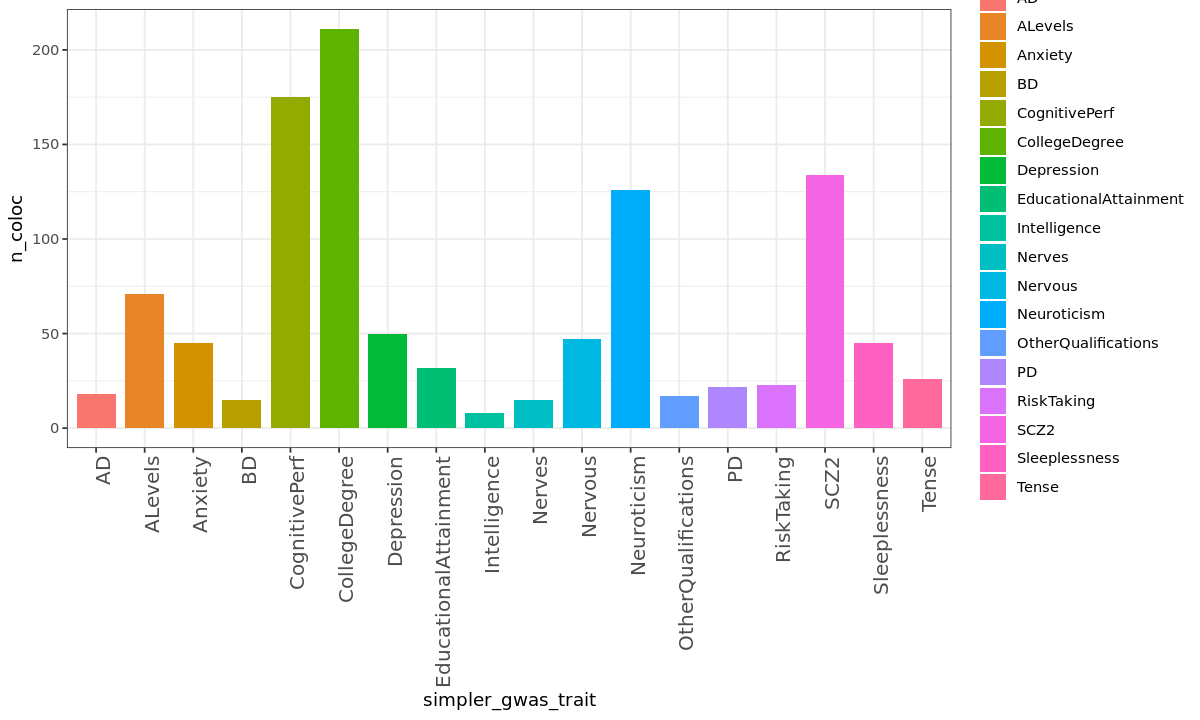

In [30]:
options(repr.plot.width=10, repr.plot.height=6)
# df = df[df$gwas_trait %in% c("SCZ2","PD","Neuroticism"),]
df %>% group_by(simpler_gwas_trait) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=simpler_gwas_trait, y = n_coloc, fill = simpler_gwas_trait)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12))

In [31]:
df$trait_category = c()
df$trait_category[df$simpler_gwas_trait %in% c('Neuroticism','Sleeplessness')] = 'Personality'
df$trait_category[df$simpler_gwas_trait %in% c('Anxiety','RiskTaking','Nerves','Nervous','Tense','Depression')] = 'Behavioural'
df$trait_category[df$simpler_gwas_trait %in% c('Intelligence','CognitivePerf')] = 'Intelligence'
df$trait_category[df$simpler_gwas_trait %in% c('BD','SCZ2')] = 'Neurodevelopmental'
df$trait_category[df$simpler_gwas_trait %in% c('PD','AD')] = 'Neurodegenerative'
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,sample_size,timepoint,condition,celltype,simpler_gwas_trait,trait_category
Neuroticism,LRRC37A2,NONE_DA,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N,170911,D52,D52,DA,Neuroticism,Personality
Depressed affect,LRRC37A2,NONE_DA,Brain_Hypothalamus,Heart_Atrial_Appendage,N,357957,D52,D52,DA,Depression,Behavioural
Neuroticism,POLR3H,NONE_DA,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N,170911,D52,D52,DA,Neuroticism,Personality
Neuroticism,FANCL,NONE_DA,Brain_Cerebellar_Hemisphere,Pancreas,N,329821,D52,D52,DA,Neuroticism,Personality
Depressed affect,ANKZF1,NONE_DA,Brain_Hypothalamus,Whole_Blood,N,357957,D52,D52,DA,Depression,Behavioural
Cognitive performance,AHSA1,NONE_DA,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N,257841,D52,D52,DA,CognitivePerf,Intelligence


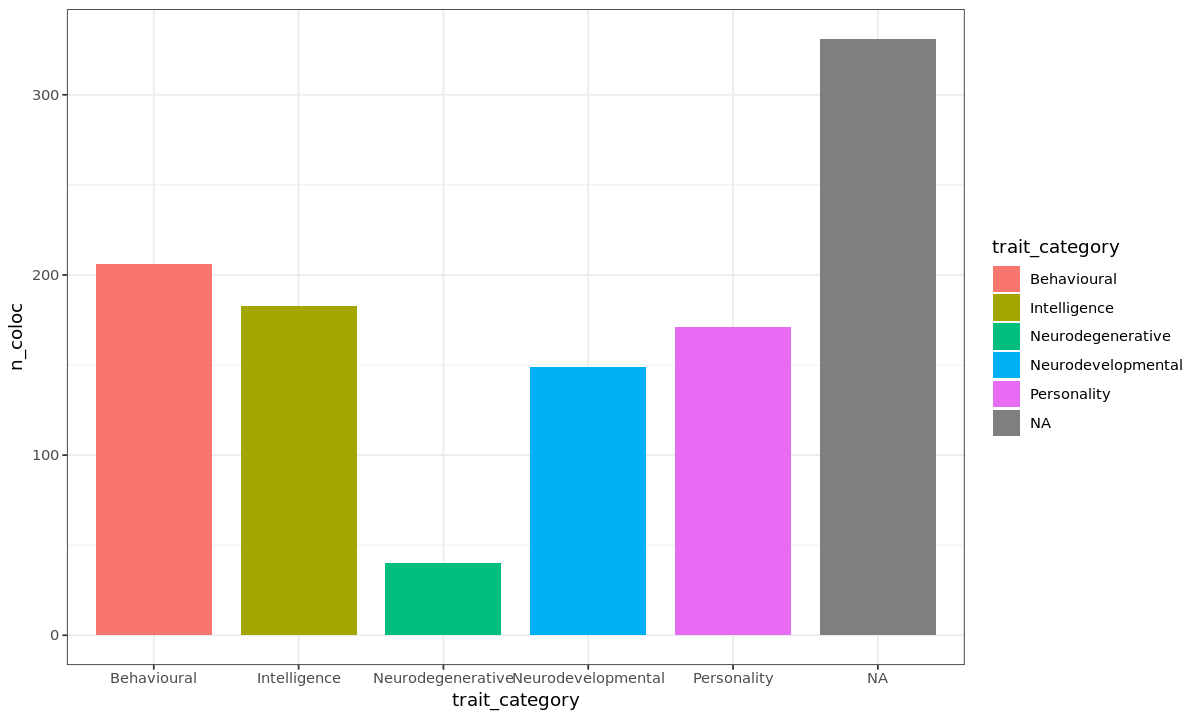

In [32]:
options(repr.plot.width=10, repr.plot.height=6)
df %>% group_by(trait_category) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=trait_category, y = n_coloc, fill = trait_category)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    theme_bw() 

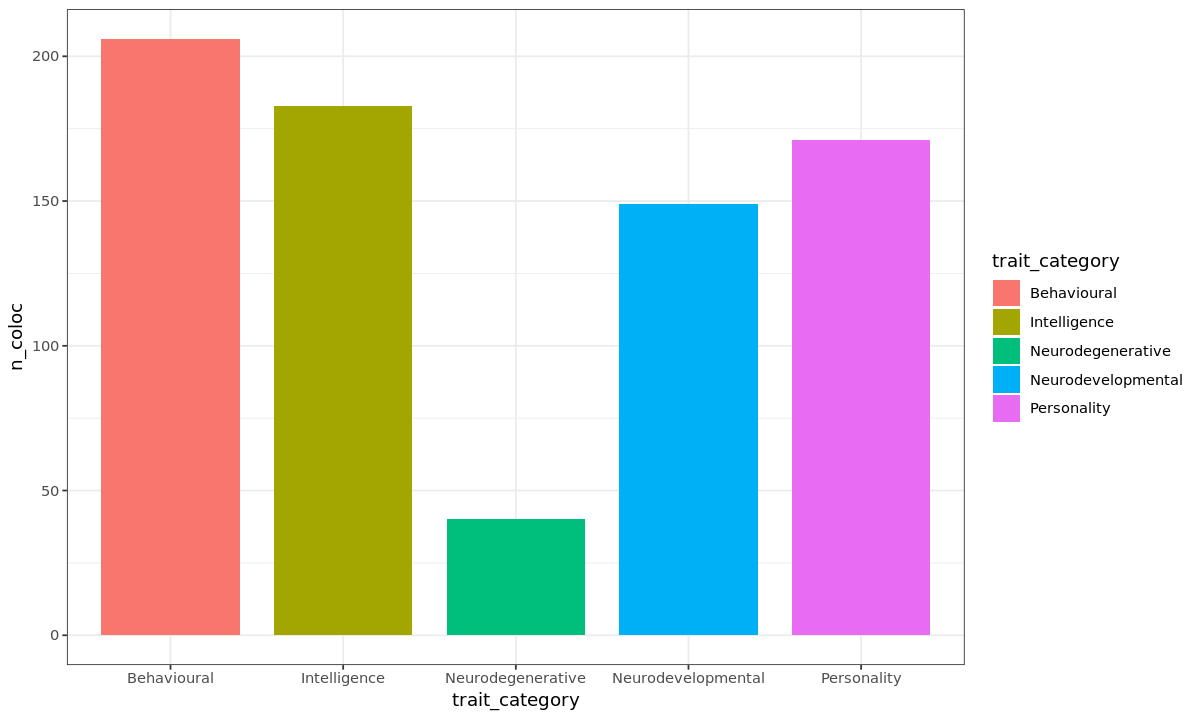

In [33]:
df = df[!(is.na(df$trait_category)),]
# head(df)
df %>% group_by(trait_category) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=trait_category, y = n_coloc, fill = trait_category)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    theme_bw() 

In [34]:
table(df$trait_category,df$condition)

                    
                     D11 D30 D52 D52_ROT
  Behavioural         47  55  63      41
  Intelligence        42  52  42      47
  Neurodegenerative    8  14  11       7
  Neurodevelopmental  33  34  42      40
  Personality         33  38  52      48

In [35]:
table(df$trait_category,df$celltype)

                    
                     FPP P_FPP NB DA Sert Epen1 Astro
  Behavioural         31    25  5 30   54    38    23
  Intelligence        29    21  5 29   44    34    21
  Neurodegenerative   11     2  2  4   12     4     5
  Neurodevelopmental  22    14  5 23   39    30    16
  Personality         17    17  7 27   45    35    23

In [36]:
head(df)

gwas_trait,gene_name,eqtl_map,top_GTEx_brain,top_GTEx_non_brain,category,sample_size,timepoint,condition,celltype,simpler_gwas_trait,trait_category
Neuroticism,LRRC37A2,NONE_DA,Brain_Cerebellar_Hemisphere,Esophagus_Muscularis,N,170911,D52,D52,DA,Neuroticism,Personality
Depressed affect,LRRC37A2,NONE_DA,Brain_Hypothalamus,Heart_Atrial_Appendage,N,357957,D52,D52,DA,Depression,Behavioural
Neuroticism,POLR3H,NONE_DA,Brain_Nucleus_accumbens_basal_ganglia,Esophagus_Mucosa,N,170911,D52,D52,DA,Neuroticism,Personality
Neuroticism,FANCL,NONE_DA,Brain_Cerebellar_Hemisphere,Pancreas,N,329821,D52,D52,DA,Neuroticism,Personality
Depressed affect,ANKZF1,NONE_DA,Brain_Hypothalamus,Whole_Blood,N,357957,D52,D52,DA,Depression,Behavioural
Cognitive performance,AHSA1,NONE_DA,Brain_Frontal_Cortex_BA9,Cells_Transformed_fibroblasts,N,257841,D52,D52,DA,CognitivePerf,Intelligence


In [37]:
options(repr.plot.width=6, repr.plot.height=4)
ND = df[df$trait_category == 'Neurodevelopmental',]
# ND = df[df$gwas_trait == 'SCZ2',]
table(ND$condition, ND$celltype)

         
          FPP P_FPP NB DA Sert Epen1 Astro
  D11      14    14  5  0    0     0     0
  D30       8     0  0  8    8    10     0
  D52       0     0  0  9   14    10     9
  D52_ROT   0     0  0  6   17    10     7

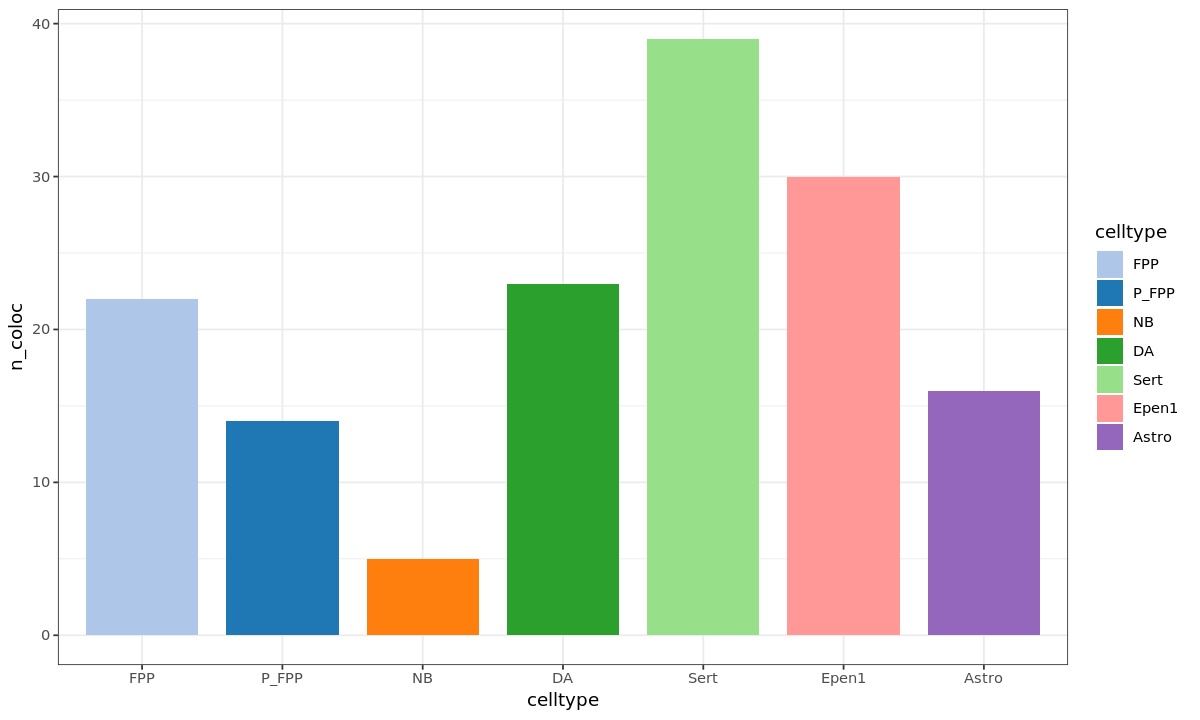

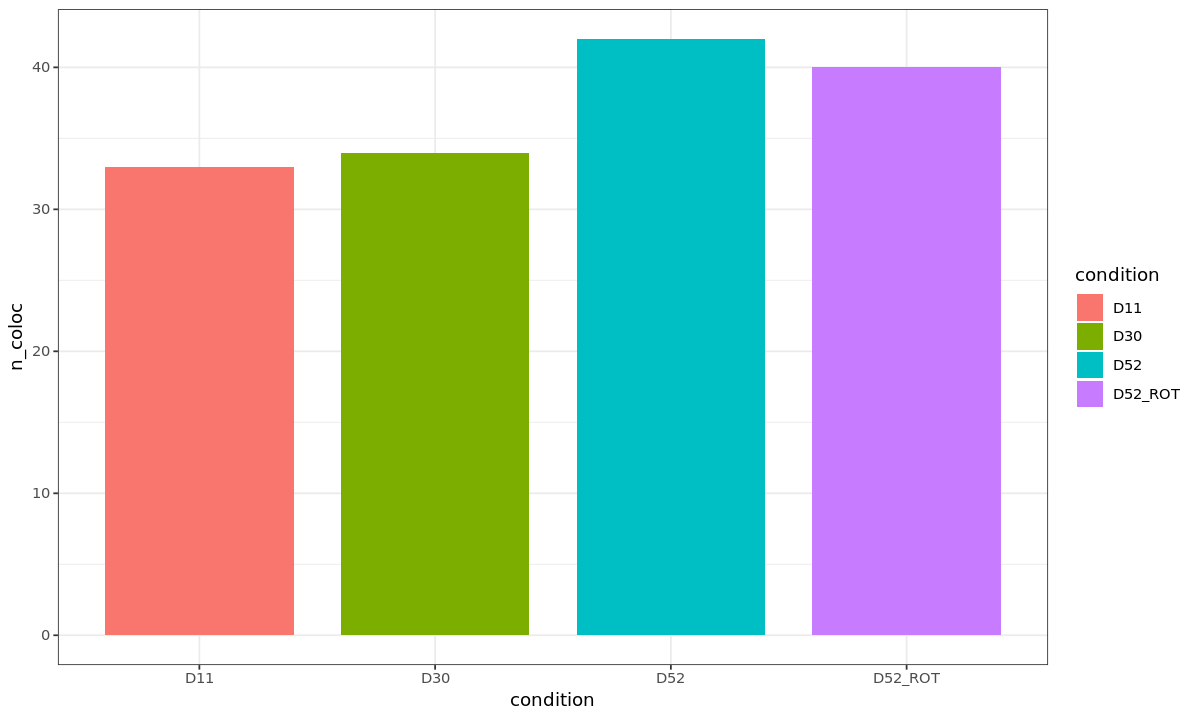

In [38]:
options(repr.plot.width=10, repr.plot.height=6)
ND %>% group_by(celltype) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=celltype, y = n_coloc, fill = celltype)) + 
    geom_bar(stat = "identity", width = 0.8) + 
    scale_fill_manual(values = c(col_FPP,col_P_FPP,col_NB,
                            col_DA,col_Sert,col_Epen1,col_Astro)) +
    theme_bw() 
ND %>% group_by(condition) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=condition, y = n_coloc, fill = condition)) + 
    geom_bar(stat = "identity", width = 0.8) +
    theme_bw() 

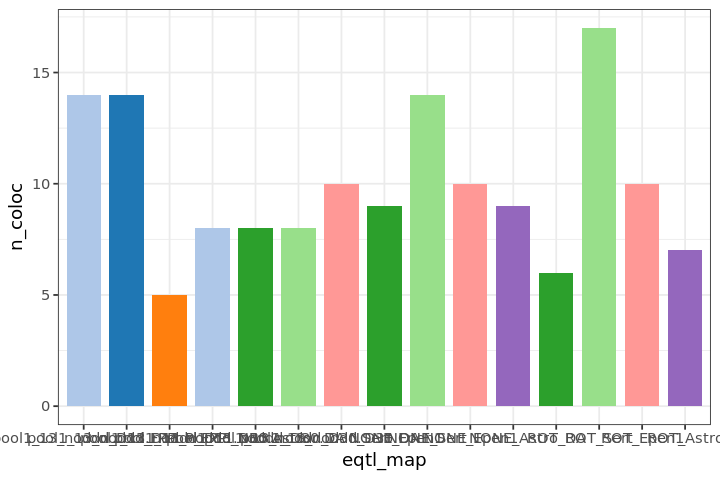

In [39]:
options(repr.plot.width=6, repr.plot.height=4)
ND %>% group_by(eqtl_map) %>% summarise(n_coloc = n()) %>% 
    ggplot(aes(x=eqtl_map, y = n_coloc, fill = eqtl_map)) + geom_bar(stat = "identity", width = 0.8) + 
    scale_fill_manual(values = c(col_FPP,col_P_FPP,col_NB,
                            col_FPP,col_DA,col_Sert,col_Epen1,
                            col_DA,col_Sert,col_Epen1,col_Astro,
                            col_DA,col_Sert,col_Epen1,col_Astro))+ theme_bw() + theme(legend.position = "none")